In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Overview
The variables in this dataset are basic information about the loan and the borrower’s credit history. I built 3 models to predict whether a loan will be charged off. Then I compared their performance to choose the best one and continued tuning the parameters.

The solution can create more opportunity for Upgrade company as prediction of potentially unpaid loan can be a measuring metric of the borrowers, avoiding losses during the lending phase and thus generating profits.

# 1. Load Dataset

### 1.1 Helper Function
1. Function to read csv file and get feature columns
2. Function to print variables information

In [5]:
def read_data_info(filename):
    '''
    get variables and their types,
    display the descriptive statistics summary
    filename: the name of the .csv file
    '''
    input_data = pd.read_csv(filename)
    feature_col_df = input_data.iloc[:,2:]
    # print the column info
    print('The data set has the following variables:')
    print(feature_col_df.columns)
    print('=====================================')
    print('The total number of variables in the data set:')
    print(feature_col_df.shape[1])
    print('=====================================')
    print('The number of variables of each type：')
    print(feature_col_df.dtypes.value_counts())
    
    return input_data,feature_col_df

### 1.2 Describe Dataset
* Get info of variable types
* Get basic summary of whole dataset

In [31]:
filename = 'loan_data.csv'
input_data,feature_col_df = read_data_info(filename)

The data set has the following variables:
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17',
       'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25',
       'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33',
       'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41',
       'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49',
       'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57',
       'col58', 'col59', 'col60', 'col61', 'col62', 'col63', 'col64', 'col65',
       'col66', 'col67', 'col68', 'col69', 'col70', 'col71', 'col72', 'col73',
       'col74', 'col75', 'col76', 'col77'],
      dtype='object')
The total number of variables in the data set:
77
The number of variables of each type：
int64      58
float64    17
object      2
dtype: int64


In [166]:
# Non-Null count and detailed data type
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87746 entries, 0 to 87745
Data columns (total 79 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      87746 non-null  int64  
 1   Target  87746 non-null  object 
 2   col1    87746 non-null  int64  
 3   col2    87746 non-null  float64
 4   col3    87746 non-null  object 
 5   col4    87746 non-null  float64
 6   col5    87746 non-null  object 
 7   col6    87746 non-null  float64
 8   col7    87746 non-null  int64  
 9   col8    87746 non-null  int64  
 10  col9    43435 non-null  float64
 11  col10   15926 non-null  float64
 12  col11   87746 non-null  int64  
 13  col12   87746 non-null  int64  
 14  col13   87746 non-null  int64  
 15  col14   87746 non-null  float64
 16  col15   87746 non-null  int64  
 17  col16   87746 non-null  int64  
 18  col17   23977 non-null  float64
 19  col18   87746 non-null  int64  
 20  col19   87746 non-null  int64  
 21  col20   87746 non-null  int64  
 22

In [167]:
# generate descriptive statistics.
input_data.describe()

,id,col1,col2,col4,col6,col7,col8,col9,col10,col11,...,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77
count,8.774600e+04,87746.000000,87746.000000,8.774600e+04,87746.000000,87746.000000,87746.000000,43435.000000,15926.000000,87746.000000,...,8.774600e+04,87746.000000,87746.000000,87746.000000,5.0,87746.000000,87746.000000,87746.000000,87746.000000,87746.000000
mean,1.355868e+06,14260.207588,2762.603500,8.355905e+04,17.357744,0.302908,0.590785,35.094141,74.207334,11.743829,...,1.887152e+05,52455.046293,24457.691701,46504.428418,0.0,0.302908,0.152531,13509.974039,44.401280,0.048640
std,5.950898e+05,9477.911375,6781.088378,9.061776e+04,8.287041,0.866468,0.861781,21.999595,25.320277,5.838714,...,1.919162e+05,51181.788129,23891.948072,45997.888651,0.0,0.866468,0.387516,18478.409123,25.143895,0.366007
min,1.860000e+02,1000.000000,0.000000,2.400000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.366080e+06,7000.000000,0.000000,5.000000e+04,11.130000,0.000000,0.000000,16.000000,58.000000,8.000000,...,5.431700e+04,21241.250000,9000.000000,16967.000000,0.0,0.000000,0.000000,2396.000000,24.600000,0.000000
50%,1.485920e+06,12000.000000,0.000000,7.000000e+04,16.950000,0.000000,0.000000,32.000000,77.000000,11.000000,...,1.229835e+05,38635.000000,17500.000000,35029.000000,0.0,0.000000,0.000000,7077.000000,42.900000,0.000000
75%,1.626072e+06,20000.000000,0.000000,1.000000e+05,23.310000,0.000000,1.000000,51.000000,93.000000,15.000000,...,2.729250e+05,66322.000000,31787.500000,62199.500000,0.0,0.000000,0.000000,17174.750000,63.000000,0.000000
max,2.260658e+06,40000.000000,40000.000000,9.522972e+06,39.990000,25.000000,5.000000,226.000000,123.000000,88.000000,...,9.999999e+06,927734.000000,460900.000000,818478.000000,0.0,25.000000,6.000000,321755.000000,154.900000,27.000000


# 2. Data Cleaning

### 2.1 Helper Function
1. Function to plot the distribution of each variable
2. Function to judge if the observation is an extreme outlier
3. Function to apply IQR scaling to outliers
4. Function to check missing values and drop or fill with median or 'unknown'

In [6]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    '''
    plot the distribution of each variable
    '''
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            # For a discrete variable, show countplot
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            # For a continuous variable, show distplot
            g = sns.histplot(dataset[column],kde=True, linewidth=0)
            plt.xticks(rotation=25)    

In [7]:
def box_plot_outliers(data_ser,box_scale):  
    '''
    judge if the observation is an extreme outlier
    '''
    # box_scale can be adjusted afterwards
    IQR=box_scale*(data_ser.quantile(0.75)-data_ser.quantile(0.25))
    val_low=data_ser.quantile(0.25)-IQR
    val_up=data_ser.quantile(0.75)+IQR
    rule_low=(data_ser<val_low)  # rule for determining small outliers
    rule_up=(data_ser>val_up)   # rule for determining large outliers
    return rule_low,rule_up,val_low,val_up   

In [8]:
def outliers(data,col,scale=3):
    '''
    IQR scaling to handle outliers
    col: the name of a numerical column
    '''
    data_n=data.copy()
    data_series=data_n[col]
    rule_low,rule_up,val_low,val_up=box_plot_outliers(data_series,box_scale=scale)
    data_n[col].loc[rule_up]=val_up
    data_n[col].loc[rule_low]=val_low
    return data_n

In [9]:
def check_null_and_fillna(input_data_0):
    '''
    check missing values and drop or fill with median or unknown
    '''
    # check percent of missing values 
    check_null_1 = input_data_0.isnull().sum(axis=0).sort_values(ascending=False)/float(input_data_0.shape[0])
    check_null_1 = pd.DataFrame(check_null_1)
    check_null_1['names'] = check_null_1.index
    check_null_1.index = range(len(check_null_1))
    check_null_1.columns = ['missing_per','names']
    per_null_data_1 = check_null_1[['names','missing_per']]
    print('The percent of missing for each varaible:')
    print(per_null_data_1)
    # display the missing info with visualization
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(18,5))
    x = per_null_data_1.names.str.slice(start=3)
    y = per_null_data_1.missing_per
    plt.plot(x,y)
    plt.xlabel("Col name")
    plt.ylabel("Null percent")
    plt.title("Pct. of missing values of each col")
    # drop columns with missing% > 60% 
    # this threshold can be adjusted afterwards
    thresh_count_1 = input_data_0.shape[0]*0.6
    input_data_1 = input_data_0.dropna(thresh=thresh_count_1, axis=1) 
    input_data_1.isnull().sum(axis=0).sort_values(ascending=False)/float(input_data_0.shape[0])
    
    # fill null with median for numerical varaibles
    numColumns = input_data_1.select_dtypes(include=[np.number]).columns
    for column in list(input_data_1.columns[input_data_1.isnull().sum() > 0]):
        if column in numColumns:
            median_val = input_data_1[column].median()            
            input_data_1[column].fillna(median_val, inplace=True)
    # fill null with 'Unknown' for categorical variables
    objectColumns = input_data_1.select_dtypes(include=["object"]).columns
    input_data_1[objectColumns] = input_data_1[objectColumns].fillna('Unknown')
    
    return input_data_1,objectColumns


### 2.2 EDA: feature distribution

* **Insights:** 

There are some variables with prominent peak periodicity, such as **col7, col8, col16, col20**, which is most likely caused by many missing values. They may have information worth exploring further.
* Object variables (2):
1. **col3**: imbalanced. Most class is `MORTGAGE`, followed by `RENT`. `OWN` class is less, and there is almost no `ANY`.
2. **col5**: imbalanced. Most class is `debt_consolidation`, followed by `credit_card` with less than half the amount of `debt_consolidation`. Other classes are less.
* Integer variables (58):
1. Almost all of integer variables are highly right-skewed, i.e., most take small values and large outliers exist. 
2. Only **col64** is highly left skewed, with almost all samples have values close to 100.
3. There are some variables that take few (less than 24) and discrete values and can be treated as categorical variables, such as **col8, col20, col22, col39, col66.**
* Float varaibles (17):
1. **highly right-skewed:** Most numerical variables are highly right-skewed, such as **col2, col7, col11, and col73, col77.**
2. **nearly bell-shaped: col6, col10.**
3. **Uniform: col67, col72**

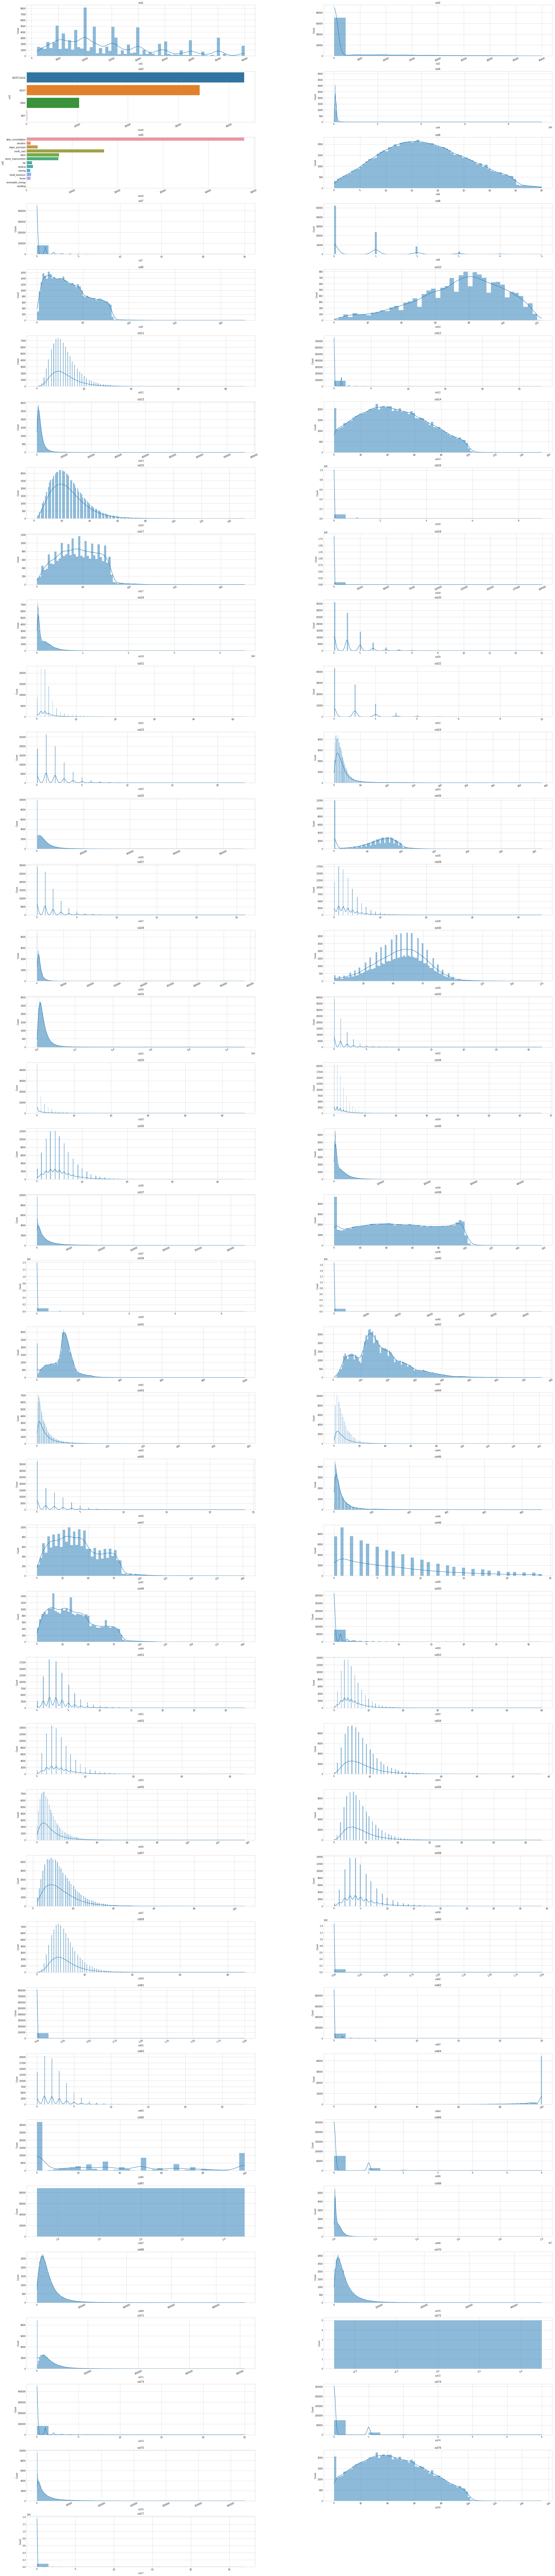

In [172]:
# get the distribution of all variables
plot_distribution(feature_col_df, cols=2, width=40, height=200, hspace=0.3, wspace=0.3)
plt.rcParams.update({'figure.max_open_warning': 0})

### 2.3 Handle outliers
After exploring the distribution, I found some outliers may affect results and assumptions, and it is not legitimate to simply drop the outliers. 

For extremely anomalous values that are more than 3 times the interquartile range, I scaled them to the upper and lower bounds, which does not affect the distribution too much but avoids extreme skewness.

In [32]:
input_data = input_data.drop(['id'],axis = 1)
COL_CONTINOUS = input_data.select_dtypes(include=[np.number]).columns

for col in COL_CONTINOUS:
	input_data_0=outliers(input_data,col,scale=3)
 # input_data_0: raw data after dropping 'id' and IQR scaling

### 2.4 Handle missing values
* **Drop:** Checking the percent of missing for each varaible, **col72, col10, col17, col49** have more than 60% missing values, so I directly drop them. This threshold can be adjusted.
* **Impute with median:** For numerical variables, this way is more robust than imputing with the mean, because it mitigates the effect of outliers. However, it does not take into account potential dependencies between columns. If the time and computing power is enough, I'll consider more sophisticated algorithms like MissForest or MICE or the kNNImputer.
* **Impute with 'unkown':** For categorical variables, I didn't impute missing values with the mode as the categorical features are imbalanced. However there are no missing values for the 2 categorical variables.

The percent of missing for each varaible:
    names  missing_per
0   col72     0.999943
1   col10     0.818499
2   col47     0.770576
3   col17     0.726745
4   col49     0.669489
..    ...          ...
73  col28     0.000000
74  col27     0.000000
75  col26     0.000000
76  col25     0.000000
77  col77     0.000000

[78 rows x 2 columns]


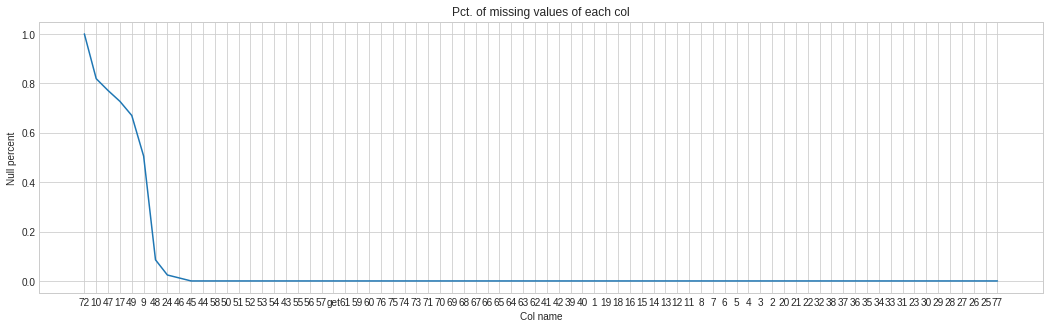

In [33]:
pd.options.mode.chained_assignment = None
input_data_1,objectColumns = check_null_and_fillna(input_data_0)
# input_data_1: data set after cleaning

# 3. Feature engineering
* In the EDA: feature distribution part, I found there are some integer variables that take few and discrete values. Lacking of enough info of the column meaning, I assume the integer columns with less than 24 unique values are categorical.
* After extracting the category variables according to this rule, I conducted one hot encoding. This approach has shortcomings in the absence of clarity about the meaning of the columns, bucause I cannot assume their hierarchical and sequential relationships.
* If the column names provided, I can generate interaction terms, e.g., to calculate the result of arithmetic operations on two features, or to perform data binning, e.g., to divide a continuous variable into more meaningful intervals.

In [175]:
objectColumns

Index(['Target', 'col3', 'col5'], dtype='object')

In [176]:
input_data_1['Target'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [177]:
input_data_1['col3'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [178]:
input_data_1['col5'].unique()

array(['debt_consolidation', 'vacation', 'major_purchase', 'credit_card',
       'other', 'home_improvement', 'car', 'medical', 'moving',
       'small_business', 'house', 'renewable_energy', 'wedding'],
      dtype=object)

['col7', 'col8', 'col12', 'col16', 'col20', 'col22', 'col23', 'col27', 'col39', 'col45', 'col60', 'col61', 'col62', 'col63', 'col66', 'col73', 'col74', 'col3', 'col5']
[21, 6, 19, 9, 15, 10, 20, 24, 9, 23, 3, 3, 20, 24, 7, 21, 7, 4, 13]


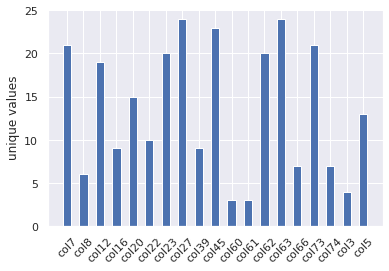

In [96]:
# filter all the categorical variables by amount of unique values
encode_col_list = []
col_unique_list = []
for col in input_data_1.columns:
    if col != 'Target':
        if input_data_1[col].dtype =='int64':
            if len(input_data_1[col].unique()) <= 24 and len(input_data_1[col].unique()) > 1:
                col_unique_list.append(len(input_data_1[col].unique()))
                encode_col_list.append(col)
encode_col_list.extend(['col3', 'col5'])
col_unique_list.extend([4, 13])
print(encode_col_list)
print(col_unique_list)

# plot the unique values of categorical variables
bar_width = 0.5
index_male = np.arange(len(encode_col_list)) 

plt.bar(encode_col_list, height=col_unique_list, width=bar_width, color='b')

plt.legend() # 显示图例
plt.xticks(index_male , encode_col_list) 
plt.ylabel('unique values') # 纵坐标轴标题
plt.xticks(rotation=45)
plt.show()

In [35]:
# One-hot encode all category type variables
temp_data = input_data_1[encode_col_list]
temp_data = pd.get_dummies(temp_data)
temp_data.columns
encode_result_col = [x for x in temp_data.columns if x not in encode_col_list]
encode_result_df = temp_data[encode_result_col]
input_data_2 = pd.concat([input_data_1,encode_result_df],axis = 1)
input_data_2 = input_data_2.drop(['col3', 'col5'],axis = 1)

# Encode the target label, 1 for `charged off` (won't be repaid)
input_data_2['Target'] = input_data_1['Target'].apply(lambda x:1 if x=='Charged Off'  else 0)
# input_data_2: data after preprocessing and encoding

# 4. Feature selection
I did the following works:
* Multivariate study: explore the correlation between each 2 feature pairs to see if highly correlated can be substituted for each other.
* EDA of the relationship between each feature and target: get an idea about which features is likely to be significant in the early stage.
* Get a early feature importance evaluation with random forest algorithm to select the TOP 20 features.
* If the correlation coefficient is greater than 0.7, remove the one with the lower feature importance.

Insights:
* The feature **col2** is significant, while col67 and col77 are the least informative. 
* The number of selected features is 13. 
* The final indicators entering the model are: 'col2', 'col1', 'col6', 'col68', 'col76', 'col75', 'col42', 'col41', 'col48', 'col30', 'col45', 'col31', 'col4'

### 4.1 Helper Function
1. Function to get feature pairs with pearson correlation coefficient > 0.7
2. Function to keep the feature with higher importance in correlated pairs

In [17]:
def pd_get_col_corr(df: pd.DataFrame, corr_thoe: float) -> list:
    """
    param df: pd.DataFrame
    param corr_thoe: sparkdf.count()
    """
    corr_result = []
    corr = df.corr()
    col_name = corr.columns
    loop_n = corr.shape[0]
    for i in range(loop_n): 
        value_col = corr.loc[col_name[i]].values
        for j in range(i, loop_n): # 只对一半的进行遍历
            if j == i:
                continue
            if abs(float(value_col[j])) > abs(float(corr_thoe)):
                msg = "{},{},{}".format(col_name[i], col_name[j], value_col[j])
                # print(msg)
                corr_result.append(msg)
    return corr_result

In [42]:
def Correlation_check_feature_selection(x_df,var_name,feature_importances_data_df):
    '''
    If the correlation coefficient is greater than 0.7, 
    remove the one with the lower feature importance.
    '''
    # =============================================================================
    #              Correlation check                              #
    # =============================================================================
    var_used_df_2 = x_df.copy()

    #corr check
    deleted_index = []
    cnt_vars = len(var_name)
    for i in range(cnt_vars):
        if i in deleted_index:
            continue
        var_name_1 = feature_importances_data_df.iloc[i,0]
        for j in range(cnt_vars):
            if i == j or j in deleted_index:
                continue
            var_name_2 = feature_importances_data_df.iloc[j,0] 
            corr = np.corrcoef(var_used_df_2[var_name_1],var_used_df_2[var_name_2])[0,1]
            if abs(corr)>= 0.7:
                IV_tmp1 = feature_importances_data_df.iloc[i,1]
                IV_tmp2 = feature_importances_data_df.iloc[j,1]
                if IV_tmp1 >= IV_tmp2:
                    deleted_index.append(j)
                else:
                    deleted_index.append(i)

    # corr result
    multi_analysis_vars = [feature_importances_data_df.iloc[i,0] for i in range(cnt_vars) if i not in deleted_index]
    print('=======================================================')    
    print('Correlation check completed')
    print('The number of selected features is:', len(multi_analysis_vars))
    
    return multi_analysis_vars

### 4.2 EDA: Correlation of features
**Insights:** 
* There are some features with exactly same information, such as col7 and col73, col14 and col76, etc. where we can only keep one of them
* For highly correlated features, we can choose one of them according their feature importance, where basic feature selection model needs to be introduced

In [184]:
# get high correlated feature pairs
# the threshold can be adjusted afterwards
col_corr =  pd_get_col_corr(input_data_1, 0.7)
col_corr

['col7,col73,1.0',
 'col11,col15,0.7187140269974236',
 'col11,col56,0.8445695439131456',
 'col11,col59,0.9988270988024235',
 'col13,col31,0.7687730968172997',
 'col14,col38,0.859819637923312',
 'col14,col65,0.7377270785288528',
 'col14,col76,1.0',
 'col15,col55,0.7161375732982427',
 'col15,col57,0.7646311969227922',
 'col15,col59,0.7163488225971806',
 'col19,col36,0.8298229910565967',
 'col19,col68,0.9692920485754459',
 'col20,col63,0.7168068914761393',
 'col22,col23,0.7278569847238382',
 'col25,col69,0.9106872019284451',
 'col25,col71,0.9544129165892361',
 'col27,col28,0.7766462505933294',
 'col27,col63,0.8414522543157393',
 'col28,col35,0.8468044566328838',
 'col31,col70,0.8116403762092206',
 'col35,col63,0.7676413115452579',
 'col36,col68,0.7830957356236179',
 'col37,col70,0.8604729932633315',
 'col37,col75,1.0',
 'col38,col65,0.8446452794165991',
 'col38,col76,0.859819637923312',
 'col51,col52,0.834190788703293',
 'col51,col53,0.808649013160137',
 'col51,col58,0.8234351296759317',


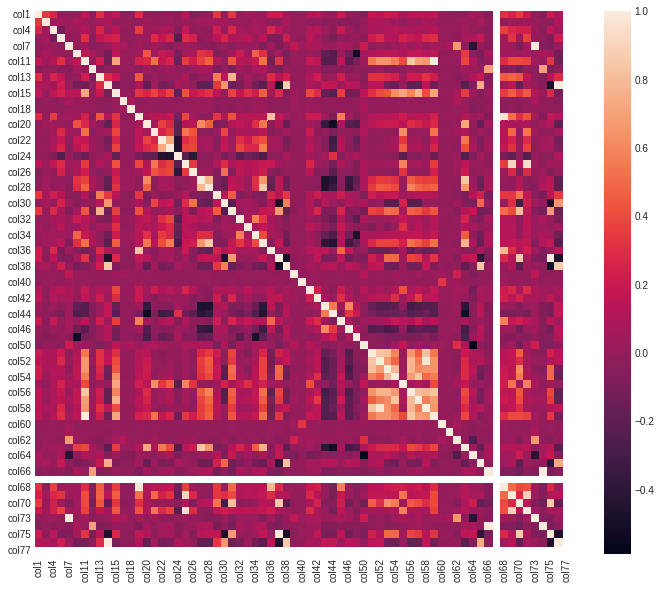

In [185]:
# feature correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(input_data_1.dropna(axis=0, how='any').corr(), ax=ax)
plt.show()

### 4.3 EDA: Features vs. target

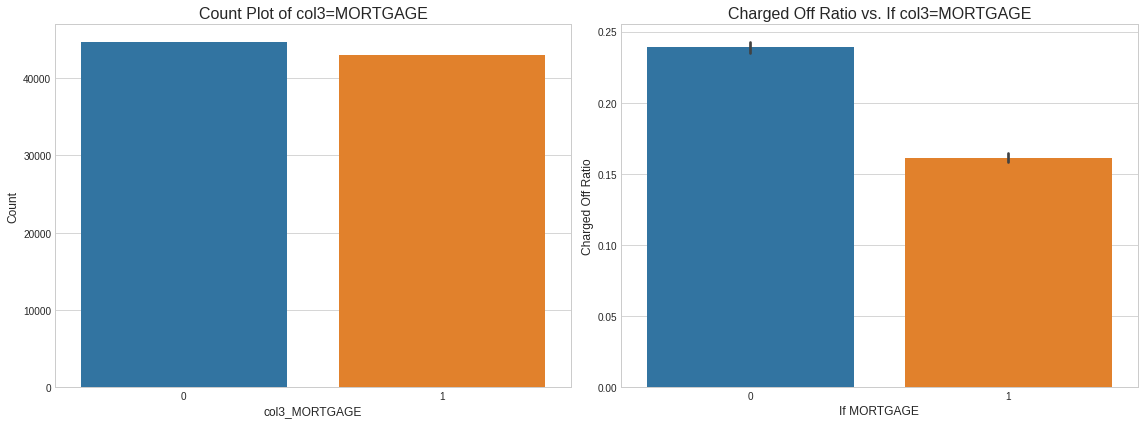

In [201]:
# If MORTGAGE & charged off rate
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col3_MORTGAGE', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col3_MORTGAGE', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col3=MORTGAGE', fontsize=16)

sns.barplot(x='col3_MORTGAGE', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('If MORTGAGE', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. If col3=MORTGAGE', fontsize=16)
plt.tight_layout()
plt.show()

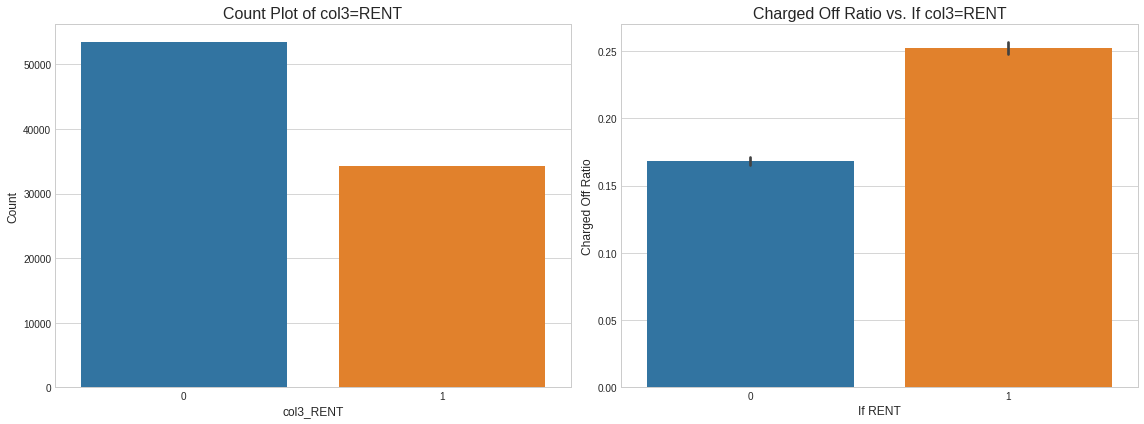

In [202]:
# If RENT & target
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col3_RENT', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col3_RENT', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col3=RENT', fontsize=16)

sns.barplot(x='col3_RENT', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('If RENT', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. If col3=RENT', fontsize=16)
plt.tight_layout()
plt.show()

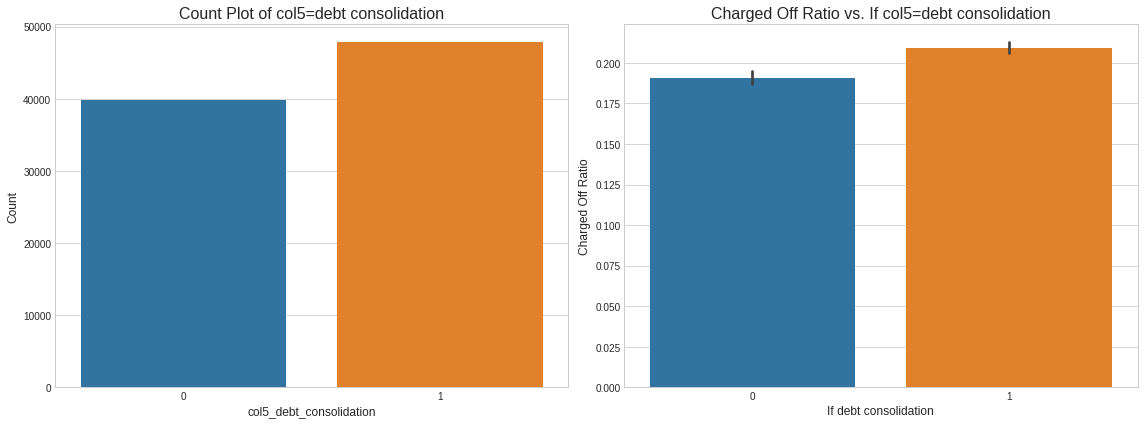

In [204]:
# If debt consolidation & target
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col5_debt_consolidation', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col5_debt_consolidation', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col5=debt consolidation', fontsize=16)

sns.barplot(x='col5_debt_consolidation', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('If debt consolidation', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. If col5=debt consolidation', fontsize=16)
plt.tight_layout()
plt.show()

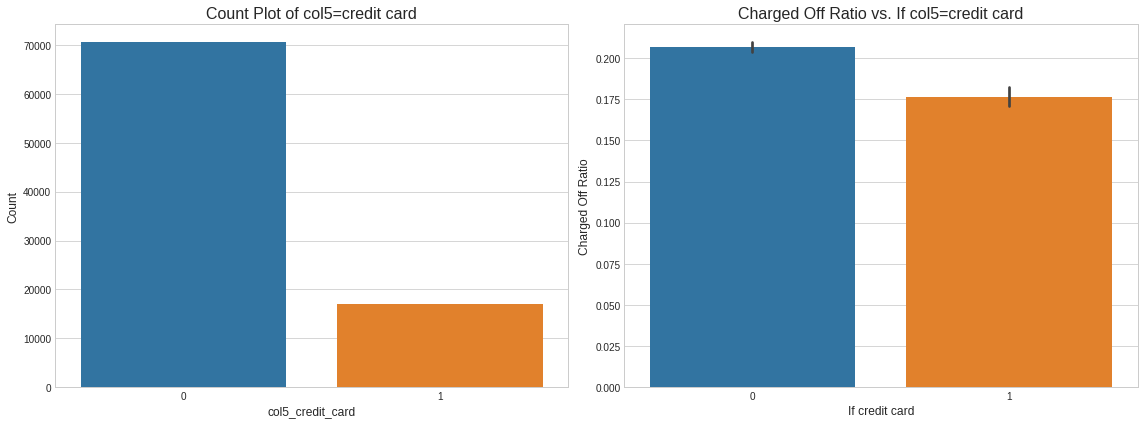

In [205]:
# If credit card & target
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col5_credit_card', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col5_credit_card', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col5=credit card', fontsize=16)

sns.barplot(x='col5_credit_card', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('If credit card', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. If col5=credit card', fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


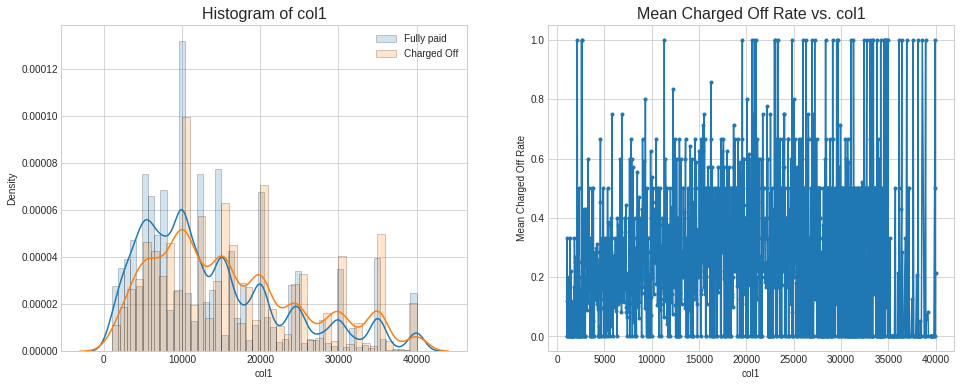

In [206]:
# Visualization of col1
grouped = input_data_2[['col1', 'Target']].groupby('col1')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(input_data_2[input_data_2['Target'] == 0]['col1'], 
             label='Fully paid', ax=ax[0], hist_kws=hist_kws)
sns.distplot(input_data_2[input_data_2['Target'] == 1]['col1'], 
             label='Charged Off', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of col1', fontsize=16)
ax[0].legend()
ax[1].plot(mean['col1'], mean['Target'], '.-')
ax[1].set_title('Mean Charged Off Rate vs. col1', fontsize=16)
ax[1].set_xlabel('col1')
ax[1].set_ylabel('Mean Charged Off Rate')
ax[1].grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


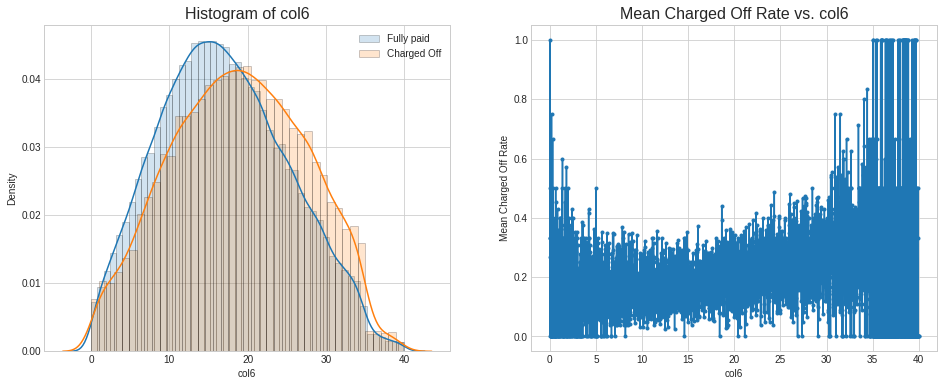

In [221]:
# Visualization of col6
grouped = input_data_2[['col6', 'Target']].groupby('col6')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(input_data_2[input_data_2['Target'] == 0]['col6'], 
             label='Fully paid', ax=ax[0], hist_kws=hist_kws)
sns.distplot(input_data_2[input_data_2['Target'] == 1]['col6'], 
             label='Charged Off', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of col6', fontsize=16)
ax[0].legend()
ax[1].plot(mean['col6'], mean['Target'], '.-')
ax[1].set_title('Mean Charged Off Rate vs. col6', fontsize=16)
ax[1].set_xlabel('col6')
ax[1].set_ylabel('Mean Charged Off Rate')
ax[1].grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


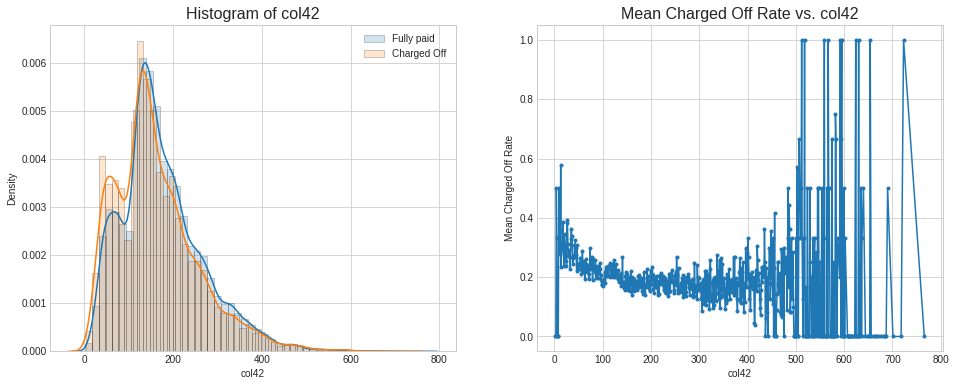

In [220]:
# Visualization of col42
grouped = input_data_2[['col42', 'Target']].groupby('col42')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(input_data_2[input_data_2['Target'] == 0]['col42'], 
             label='Fully paid', ax=ax[0], hist_kws=hist_kws)
sns.distplot(input_data_2[input_data_2['Target'] == 1]['col42'], 
             label='Charged Off', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of col42', fontsize=16)
ax[0].legend()
ax[1].plot(mean['col42'], mean['Target'], '.-')
ax[1].set_title('Mean Charged Off Rate vs. col42', fontsize=16)
ax[1].set_xlabel('col42')
ax[1].set_ylabel('Mean Charged Off Rate')
ax[1].grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


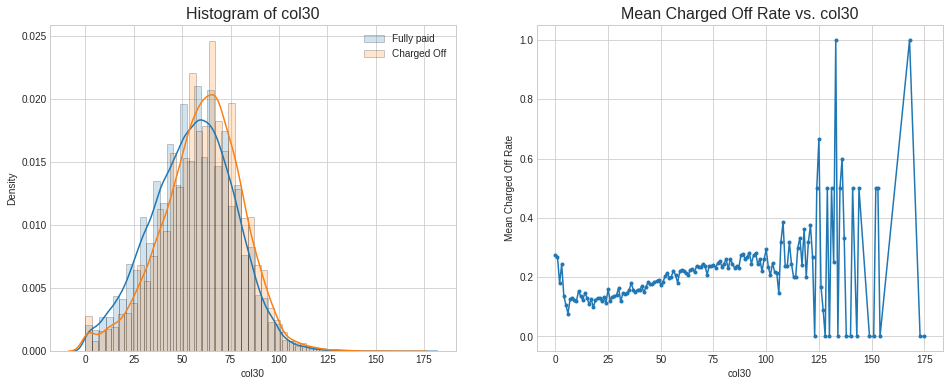

In [219]:
# Visualization of col30
grouped = input_data_2[['col30', 'Target']].groupby('col30')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(input_data_2[input_data_2['Target'] == 0]['col30'], 
             label='Fully paid', ax=ax[0], hist_kws=hist_kws)
sns.distplot(input_data_2[input_data_2['Target'] == 1]['col30'], 
             label='Charged Off', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of col30', fontsize=16)
ax[0].legend()
ax[1].plot(mean['col30'], mean['Target'], '.-')
ax[1].set_title('Mean Charged Off Rate vs. col30', fontsize=16)
ax[1].set_xlabel('col30')
ax[1].set_ylabel('Mean Charged Off Rate')
ax[1].grid(True)
plt.show()

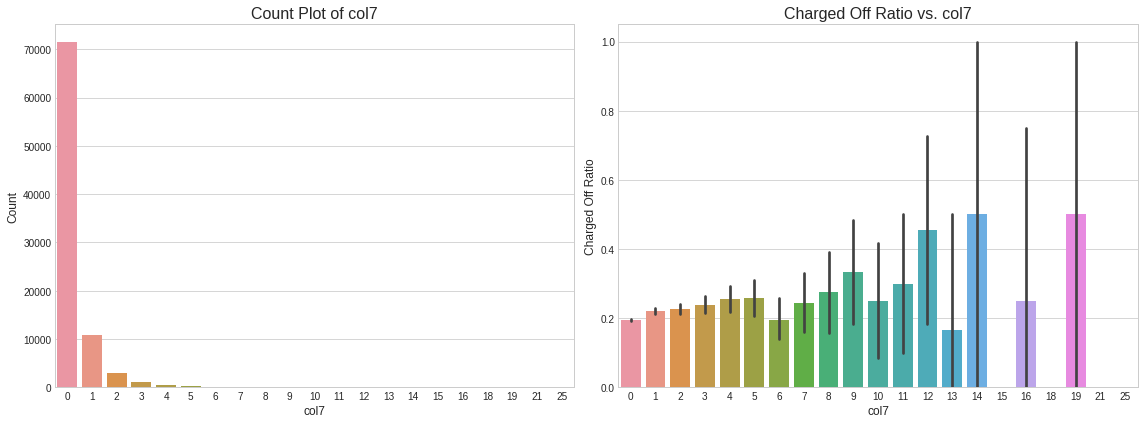

In [20]:
# visualization of col7
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col7', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col7', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col7', fontsize=16)

sns.barplot(x='col7', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('col7', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. col7', fontsize=16)
plt.tight_layout()
plt.show()

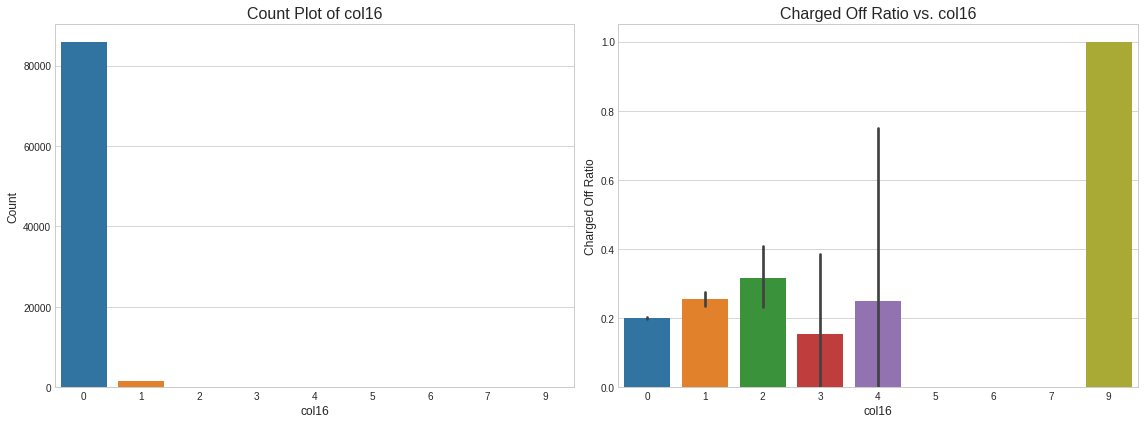

In [21]:
# visualization of col16
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col16', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col16', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col16', fontsize=16)

sns.barplot(x='col16', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('col16', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. col16', fontsize=16)
plt.tight_layout()
plt.show()

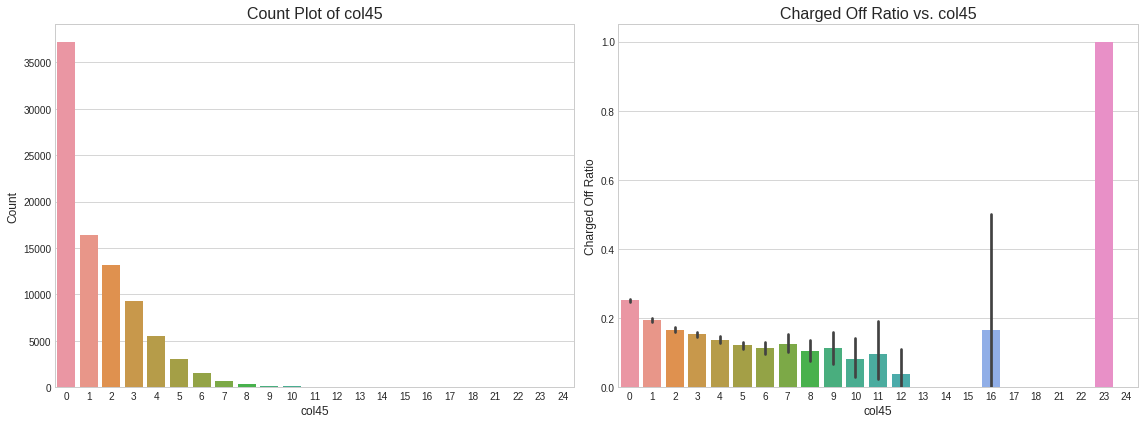

In [19]:
# visualization of col45
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col45', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col45', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col45', fontsize=16)

sns.barplot(x='col45', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('col45', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. col45', fontsize=16)
plt.tight_layout()
plt.show()

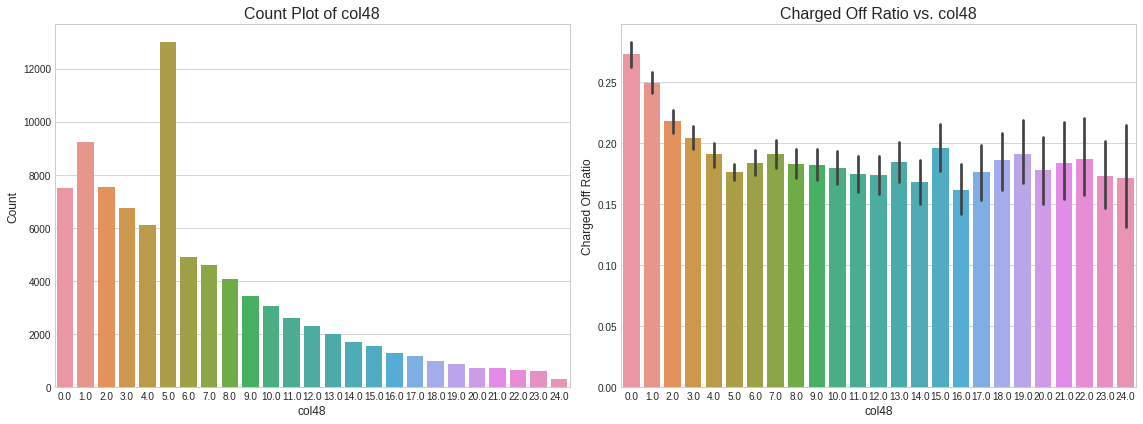

In [209]:
# visualization of col48
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='col48', data=input_data_2, ax=ax[0])
ax[0].set_xlabel('col48', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of col48', fontsize=16)

sns.barplot(x='col48', y='Target', data=input_data_2, ax=ax[1])
ax[1].set_xlabel('col48', fontsize=12)
ax[1].set_ylabel('Charged Off Ratio', fontsize=12)
ax[1].set_title('Charged Off Ratio vs. col48', fontsize=16)
plt.tight_layout()
plt.show()

### 4.4 Final feature set

In [57]:
label = 'Target'
data_pos = input_data_2[input_data_2[label]==1]
data_neg = input_data_2[input_data_2[label]==0]
new_data_pos = pd.concat([data_pos,data_pos],axis = 0) 
# input_data_3: double the amount of positive samples
input_data_3 = pd.concat([new_data_pos,data_neg],axis = 0)
# get feature importance ranking with random forest algorithm
x_columns = [x for x in input_data_3.columns if x != label]  

x = input_data_3[x_columns]
y = input_data_3[label]

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = 0)
rf.fit(x, y)
feature_importances = rf.feature_importances_

feature_importances_data = pd.DataFrame({'feature':x.columns,'feature_importances':feature_importances})

feature_importances_data = feature_importances_data.sort_values(["feature_importances"],ascending= False)
feature_importances_data

,feature,feature_importances
1,col2,0.772884
0,col1,0.012058
3,col6,0.007864
67,col76,0.007429
66,col75,0.007218
...,...,...
69,col3_ANY,0.000018
82,col5_renewable_energy,0.000018
68,col77,0.000000
59,col67,0.000000


In [58]:
# Select the TOP50 features
n = 50
var_name = feature_importances_data.iloc[0:n,0]
x= x[var_name]
print('Selected important features are:')
print(x.columns)

Selected important features are:
Index(['col2', 'col1', 'col6', 'col76', 'col75', 'col68', 'col14', 'col37',
       'col36', 'col38', 'col42', 'col45', 'col4', 'col41', 'col19', 'col48',
       'col30', 'col31', 'col13', 'col70', 'col29', 'col46', 'col69', 'col65',
       'col15', 'col26', 'col71', 'col24', 'col25', 'col43', 'col55', 'col57',
       'col3_RENT', 'col28', 'col52', 'col35', 'col44', 'col8', 'col64',
       'col51', 'col58', 'col34', 'col54', 'col59', 'col11', 'col56', 'col53',
       'col63', 'col33', 'col32'],
      dtype='object')


**Note:** The col2 will result in a model prediction accuracy of 1, which may be a problematic variable, so remove it here

In [81]:
# If the correlation coefficient is greater than 0.7, 
# remove the one with the lower feature importance.
multi_analysis_vars = Correlation_check_feature_selection(x,var_name,feature_importances_data)
del multi_analysis_vars[0]
X = x[multi_analysis_vars]

Correlation check completed
The number of selected features is: 31


In [72]:
print('The final indicators entering the model are:')
print(multi_analysis_vars)

The final indicators entering the model are:
['col1', 'col6', 'col76', 'col75', 'col68', 'col42', 'col45', 'col4', 'col41', 'col48', 'col30', 'col31', 'col29', 'col46', 'col69', 'col15', 'col26', 'col24', 'col43', 'col3_RENT', 'col28', 'col52', 'col44', 'col8', 'col64', 'col34', 'col54', 'col63', 'col33', 'col32']


# 5. Modeling


### 5.1 Split data
Negative class 'Fully paid' consists of about 66% of all examples, there is some imbalance in the dataset. so

* I use AUC other than accuracy when learning the model, and
* I use class weights when training my Machine Learning models

In [76]:
from sklearn.utils import shuffle
input_data_3 = shuffle(input_data_3)

X = input_data_2[multi_analysis_vars]
Y = input_data_2[label]

# =============================================================================
# Split data into training and testing sets 70%/30%
# =============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=22)
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,confusion_matrix,classification_report,recall_score,roc_curve, roc_auc_score,auc,accuracy_score

In [77]:
input_data_3[label].value_counts(normalize=True)

0    0.665246
1    0.334754
Name: Target, dtype: float64

### 5.2 Training models

#### 5.2.1 Random Forest Model

rf Running time: 33.70811080932617 Seconds
The AUC of random forest is：  0.8523317979601596
The acc of random forest is：  0.8919850708502024
The f1 of random forest is：  0.8186308354134578


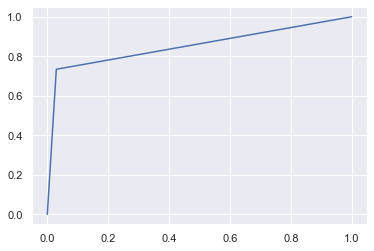

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 123,class_weight = {1:2, 0:1})

import time
start =time.time()

rf.fit(X_train, y_train)

end=time.time()
print('rf Running time: %s Seconds'%(end-start))

y_predict = rf.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
sns.set()
plt.plot(fpr, tpr)
AUC_rf =  auc(fpr, tpr)
print('The AUC of random forest is： ',AUC_rf)
acc_rf = metrics.accuracy_score(y_test, y_predict)
print('The acc of random forest is： ',acc_rf)
f1_rf = f1_score(y_test, y_predict)
print('The f1 of random forest is： ',f1_rf)

#### 5.2.2 XGBoost Model

[13:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


xgboost Running time: 32.81242871284485 Seconds
The AUC of xgb is：  0.8232993817085921
The acc of xgb is：  0.8310981781376519
The f1 of xgb is：  0.7587422065600432


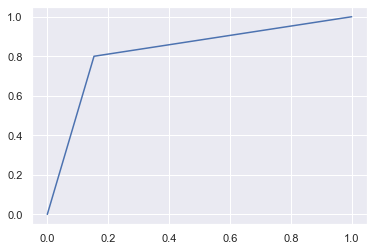

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(class_weight = {1:2, 0:1},max_depth=15,scale_pos_weight=10 ,random_state=123,learning_rate=0.5, n_estimators=200,subsample=1, colsample_bytree=1, reg_alpha=0, reg_lambda=1)

import time
start =time.time()

xgbc.fit(X_train, y_train)

end=time.time()
print('xgboost Running time: %s Seconds'%(end-start))


y_predict_xgb = xgbc.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, thresholds = roc_curve(y_test, y_predict_xgb)
sns.set()
plt.plot(fpr, tpr)
AUC_xgb =  auc(fpr, tpr)
print('The AUC of xgb is： ',AUC_xgb)
acc_xgb = metrics.accuracy_score(y_test, y_predict_xgb)
print('The acc of xgb is： ',acc_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb)
print('The f1 of xgb is： ',f1_xgb)

#### 5.2.3 lightGBM model

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,precision_score,confusion_matrix,classification_report,recall_score

lgb=LGBMClassifier(boosting_type='gbdt',
                    objective='binary',
                    n_estimators=2000,
                    num_leaves=150, 
                    max_depth=13,
                    min_data_in_leaf=30,
                    lambda_l1=0.1,
                    lambda_l2=0.2,
                    class_weight = {1:2, 0:1},
                    feature_fraction=1,  
                    bagging_fraction=0.8, 
                    bagging_freq=5,
                    learning_rate=0.01,
                    n_jobs=-1)


variable_category = [x for x in multi_analysis_vars if x in encode_col_list]

import time
start =time.time()

lgb.fit(X_train, y_train, categorical_feature=variable_category,
         early_stopping_rounds=200,eval_set=[(X_train, y_train), (X_test, y_test)])

end=time.time()
print('LGB Running time: %s Seconds'%(end-start))


y_predict_lgb =lgb.predict(X_test)

The AUC of lgb is：  0.5798628850563283
The acc of lgb is：  0.783467558121866
The f1 of lgb is：  0.30774836045664317


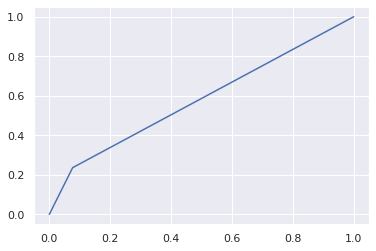

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, thresholds = roc_curve(y_test, y_predict_lgb)
sns.set()
plt.plot(fpr, tpr)
AUC_lgb =  auc(fpr, tpr)
print('The AUC of lgb is： ',AUC_lgb)
acc_lgb = metrics.accuracy_score(y_test, y_predict_lgb)
print('The acc of lgb is： ',acc_lgb)
f1_lgb = f1_score(y_test, y_predict_lgb)
print('The f1 of lgb is： ',f1_lgb)

### 5.5 Model Comparison


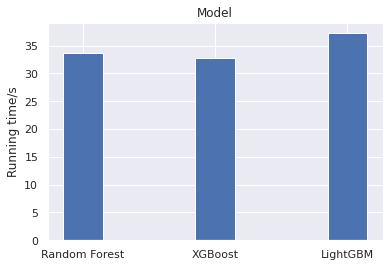

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Running time compare
models = ('Random Forest', 'XGBoost', 'LightGBM')
model_running_time = [33.71,32.81,37.21]


bar_width = 0.3
index_male = np.arange(len(models)) 

plt.bar(index_male, height=model_running_time, width=bar_width, color='b')

plt.legend()
plt.xticks(index_male,models) 
plt.ylabel('Running time/s')
plt.title('Model')

plt.show()

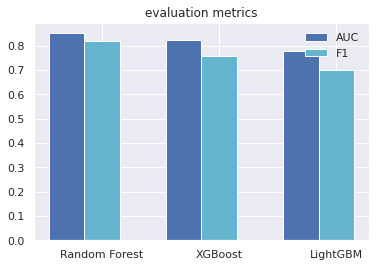

In [89]:
# AUC compare
model_AUC = [0.852,0.823,0.778]
model_f1 = [0.819,0.759,0.70]

bar_width = 0.3
index_AUC = np.arange(len(models))
index_f1 = index_AUC + bar_width


plt.bar(index_AUC, height=model_AUC, width=bar_width, color='b', label='AUC')
plt.bar(index_f1, height=model_f1, width=bar_width, color='c', label='F1')

plt.legend()
plt.xticks(index_AUC + bar_width, models) 
plt.title('evaluation metrics')

plt.show()

### 5.6 Feature importance

0.008277849219305102 col3_RENT
0.012375366571739705 col8
0.016092536019445835 col32
0.017394836633932518 col33
0.017416418638184886 col45
0.01757536010715704 col63
0.020248031443294626 col34
0.022248751331052224 col28
0.025661811207144523 col64
0.025756425238097114 col44
0.026820744946605312 col54
0.028615330252304533 col52
0.029053700136487358 col43
0.029978214075905337 col48
0.034137529057712813 col46
0.03440340734227589 col24
0.03442581365687731 col26
0.03562747470042967 col15
0.03990399895560004 col30
0.04174034396942592 col4
0.0419902650909923 col69
0.042925727120704825 col29
0.04331416202554724 col31
0.044182621724798074 col41
0.04582297944017327 col42
0.04985424719278673 col68
0.05121260320702719 col75
0.052523190060058685 col76
0.054523188921546666 col6
0.05589707171338732 col1


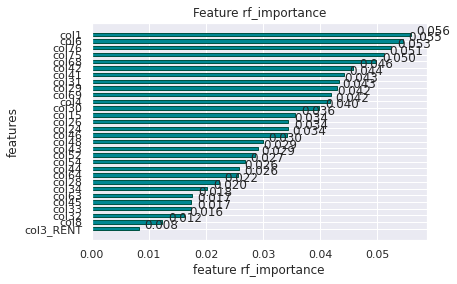

In [90]:
# feature importance plot of Random Forest model
from pandas import DataFrame as df
features_import = df(X_train.columns, columns=['feature'])
features_import['rf_importance'] = rf.feature_importances_ 
features_import.sort_values('rf_importance', inplace=True)
# plot
from matplotlib import pyplot as plt

plt.barh(features_import['feature'], features_import['rf_importance'], height=0.5, color='#008792', edgecolor='#005344')
plt.xlabel('feature rf_importance')
plt.ylabel('features')
plt.title('Feature rf_importance')
for a,b in zip( features_import['rf_importance'],features_import['feature']):
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a))
plt.show()


0.024868596345186234 col46
0.02711106836795807 col26
0.027135690674185753 col15
0.02760637365281582 col43
0.027909211814403534 col24
0.028084320947527885 col52
0.028598789125680923 col42
0.02899845317006111 col68
0.02949683740735054 col1
0.029728304594755173 col63
0.03019852004945278 col75
0.03082103841006756 col31
0.03092111274600029 col76
0.03148335590958595 col64
0.03174518048763275 col6
0.03196161240339279 col30
0.03211776167154312 col33
0.03214114159345627 col28
0.032241977751255035 col54
0.032516755163669586 col48
0.03326883167028427 col8
0.034117359668016434 col69
0.0351172499358654 col44
0.035371083766222 col45
0.03597941994667053 col32
0.037543557584285736 col29
0.042339492589235306 col3_RENT
0.0437745526432991 col41
0.04547944664955139 col34
0.06132277473807335 col4


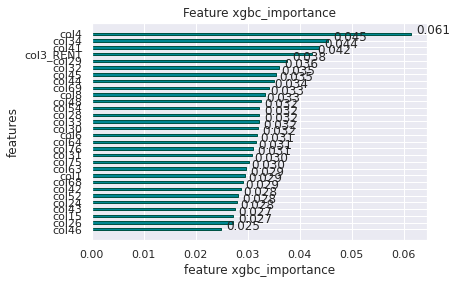

In [91]:
# feature importance plot of XGBoost model
features_import['xgbc_importance'] = xgbc.feature_importances_ 
features_import.sort_values('xgbc_importance', inplace=True)

from matplotlib import pyplot as plt
plt.barh(features_import['feature'], features_import['xgbc_importance'], height=0.35, color='#008792', edgecolor='#005344')
plt.xlabel('feature xgbc_importance')
plt.ylabel('features')
plt.title('Feature xgbc_importance')
for a,b in zip( features_import['xgbc_importance'],features_import['feature']):
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a))
plt.show()

1024 col6
1341 col4
2809 col42
3527 col15
5283 col68
6486 col30
6584 col34
6991 col75
7057 col44
8398 col26
8907 col48
9765 col24
10855 col31
11477 col32
11497 col64
11615 col1
11912 col35
14571 col46
14578 col52
14662 col41
15050 col45
15098 col76
15362 col43
15643 col29
15775 col54
16497 col3_RENT
16972 col69
17254 col8


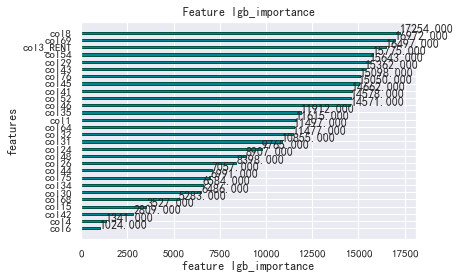

In [ ]:
# feature importance plot of lightGBM model
features_import['lgb_importance'] = lgb.feature_importances_ 
features_import.sort_values('lgb_importance', inplace=True)

from matplotlib import pyplot as plt
plt.barh(features_import['feature'], features_import['lgb_importance'], height=0.3, color='#008792', edgecolor='#005344')
plt.xlabel('feature lgb_importance')
plt.ylabel('features')
plt.title('Feature lgb_importance')
for a,b in zip( features_import['lgb_importance'],features_import['feature']):
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a))
plt.show()

### 5.7 Tuning XGBoost model

In [94]:
# Tune the optimal learning rate and the number of trees
from sklearn.model_selection import GridSearchCV
clf1 = XGBClassifier(class_weight = {1:2, 0:1})
  
# Set the parameter range for grid search of 6 main parameters
param_dist = {
        'n_estimators':range(80,200,40),
        'learning_rate':np.linspace(0.01,2,20),
        }
 
 
#GridSearchCV: clf1 set the training learner
#param_dist: dictionary, set the range
#scoring = 'roc_auc', set the evaluation metric
#n_jobs = -1，use 1 CPU for training
grid = GridSearchCV(clf1,param_dist,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
# training
grid.fit(X_train.values,np.ravel(y_train.values))
# return the best one
best_estimator = grid.best_estimator_
print(best_estimator)   

XGBClassifier(class_weight={0: 1, 1: 2}, learning_rate=0.11473684210526315,
              n_estimators=160)


In [ ]:
# the auc score of the best model
grid.best_score_ 

0.7672783043674277

In [97]:
# tuning max_depth

clf2 = XGBClassifier(class_weight = {1:2, 0:1},learning_rate=0.638421052631579,n_estimators=160)
  
# Set the parameter range for grid search of 6 main parameters
param_dist_2 = {
        'max_depth':range(6,17,2),
        #'gamma':np.linspace(0.1,0.5,5),
        #'subsample':np.linspace(0.7,1.1,10),
        #'colsample_bytree':np.linspace(0.5,1,5),
        #'min_child_weight':range(1,9,1)
        }
 
grid_2 = GridSearchCV(clf2,param_dist_2,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
# training
grid_2.fit(X_train.values,np.ravel(y_train.values))
# return the best one
best_estimator_2 = grid_2.best_estimator_
print(best_estimator_2)   
print('the auc score of the best model:')
print(grid_2.best_score_ )

XGBClassifier(class_weight={0: 1, 1: 2}, learning_rate=0.638421052631579,
              max_depth=16, n_estimators=160)
the auc score of the best model:
0.6668429040619067


In [ ]:
grid_2.best_params_

{'max_depth': 16}

In [98]:
# tuning subsample

clf3 = XGBClassifier(class_weight = {1:2, 0:1},learning_rate=0.638421052631579,n_estimators=160,max_depth=16)
  
# Set the parameter range for grid search of 6 main parameters
param_dist_3 = {
        #'max_depth':range(6,17,2),
        #'gamma':np.linspace(0.1,0.5,5),
        'subsample':np.linspace(0.8,1,10),
        #'colsample_bytree':np.linspace(0.5,1,5),
        #'min_child_weight':range(1,9,1)
        }
 
grid_3 = GridSearchCV(clf3,param_dist_3,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
# training
grid_3.fit(X_train.values,np.ravel(y_train.values))
# return the best one
best_estimator_3 = grid_3.best_estimator_
print(best_estimator_3)   
print('the auc score of the best model:')
print(grid_3.best_score_ )

XGBClassifier(class_weight={0: 1, 1: 2}, learning_rate=0.638421052631579,
              max_depth=16, n_estimators=160, subsample=1.0)
the auc score of the best model:
0.6668429040619067


In [ ]:
grid_3.best_params_

{'subsample': 0.9555555555555555}

In [100]:
#tuning colsample_bytree

clf4 = XGBClassifier(class_weight = {1:2, 0:1},learning_rate=0.638421052631579,n_estimators=160,max_depth=16,subsample = 0.96)
  
# Set the parameter range for grid search of 6 main parameters
param_dist_4 = {
        #'max_depth':range(6,17,2),
        #'gamma':np.linspace(0.1,0.5,5),
        #'subsample':np.linspace(0.6,1,10),
        'colsample_bytree':np.linspace(0.5,1,5),
        #'min_child_weight':range(1,9,1)
        }
 
grid_4 = GridSearchCV(clf4,param_dist_4,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
# training
grid_4.fit(X_train.values,np.ravel(y_train.values))
# return the best one
best_estimator_4 = grid_4.best_estimator_
print(best_estimator_4)   
print('the auc score of the best model:')
print(grid_4.best_score_ )

XGBClassifier(class_weight={0: 1, 1: 2}, colsample_bytree=1.0,
              learning_rate=0.638421052631579, max_depth=16, n_estimators=160,
              subsample=0.96)
the auc score of the best model:
0.6652454645669462


In [ ]:
grid_4.best_params_

{'colsample_bytree': 0.875}

In [101]:
#tuning min_child_weight

clf5 = XGBClassifier(class_weight = {1:2, 0:1},learning_rate=0.638421052631579,n_estimators=160,max_depth=16,subsample =0.96)
  
#Set the parameter range for grid search of 6 main parameters
param_dist_5 = {
        #'max_depth':range(6,17,2),
        #'gamma':np.linspace(0.1,0.5,5),
        #'subsample':np.linspace(0.7,1.1,10),
        #'colsample_bytree':np.linspace(0.5,1,5),
        'min_child_weight':range(1,9,1)
        }
 
grid_5 = GridSearchCV(clf5,param_dist_5,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
#training
grid_5.fit(X_train.values,np.ravel(y_train.values))
#return the best one
best_estimator_5 = grid_5.best_estimator_
print(best_estimator_5)   
print('the auc score of the best model:')
print(grid_5.best_score_ )

XGBClassifier(class_weight={0: 1, 1: 2}, learning_rate=0.638421052631579,
              max_depth=16, n_estimators=160, subsample=0.96)
the auc score of the best model:
0.6652454645669462


In [102]:
grid_5.best_params_

{'min_child_weight': 1}

In [104]:
#tuning gamma

clf6 = XGBClassifier(class_weight = {1:2, 0:1},learning_rate=0.638421052631579,n_estimators=160,max_depth=16,subsample =0.96)
  
#Set the parameter range for grid search of 6 main parameters
param_dist_6 = {
        #'max_depth':range(6,17,2),
        'gamma':np.linspace(0.1,0.5,5),
        #'subsample':np.linspace(0.7,1.1,10),
        #'colsample_bytree':np.linspace(0.5,1,5),
        #'min_child_weight':range(1,9,1)
        }
 
grid_6 = GridSearchCV(clf6,param_dist_6,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
#training
grid_6.fit(X_train.values,np.ravel(y_train.values))
#return the best one
best_estimator_6 = grid_6.best_estimator_
print(best_estimator_6)   
print('the auc score of the best model:')
print(grid_6.best_score_ )

XGBClassifier(class_weight={0: 1, 1: 2}, gamma=0.30000000000000004,
              learning_rate=0.638421052631579, max_depth=16, n_estimators=160,
              subsample=0.96)
the auc score of the best model:
0.6609614886338461


In [105]:
grid_6.best_params_

{'gamma': 0.30000000000000004}

In [106]:
#tuning lambda, alpha
# keep the best parameters from above
clf7 = XGBClassifier(class_weight = {1:2, 0:1},learning_rate=0.638421052631579,n_estimators=160,max_depth=16,subsample =0.96)
  
param_dist_7 = {
        'reg_lambda':[0,1]        ,
        'reg_alpha':[0,1]
       
        }
 
grid_7 = GridSearchCV(clf7,param_dist_7,cv = 3,scoring = 'roc_auc',n_jobs = -1)
  
#training
grid_7.fit(X_train.values,np.ravel(y_train.values))
#return the best one
best_estimator_7 = grid_7.best_estimator_
print(best_estimator_7)   
print('the auc score of the best model:')
print(grid_7.best_score_ )

XGBClassifier(class_weight={0: 1, 1: 2}, learning_rate=0.638421052631579,
              max_depth=16, n_estimators=160, reg_alpha=1, reg_lambda=0,
              subsample=0.96)
the auc score of the best model:
0.667137248891847


In [107]:
grid_7.best_params_

{'reg_alpha': 1, 'reg_lambda': 0}

* The best auc score during the parameter tuning is the setting of grid_2
* The auc score is 0.8234577

# Solution summary

**1.Handle missing values**

* For variables having more than 60% missing values, directly drop them.
* Impute numerical variables with median
* Impute categorical variables with mode or 'unkown'
* Pros：the 60% threshold can be flexibly adjusted, and median is more robust because it mitigates the effect of outliers.
* Cons: did not take into account potential dependencies between columns

**2.Handle categorical variables**

* Assume the integer columns with less than 24 unique values are categorical, and they are already given as encoded
* Conducted one hot encoding to the categorical variables col3 and col5
* Pros: only generate 17 new features so no worries about the curse of dimensionality
* Cons: Lacking of enough info of the column meaning, the assumptions might be wrong, and I cannot assume ordinal variables here. 

**3.Variables selected**

* If the correlation coefficient is greater than 0.7, remove the one with the lower feature importance.
* The final indicators entering the model are:
'col1', 'col6', 'col76', 'col75', 'col68', 'col42', 'col45', 'col4', 'col41', 'col48', 'col30', 'col31', 'col29', 'col46', 'col69', 'col15', 'col26', 'col24', 'col43', 'col3_RENT', 'col28', 'col52', 'col44', 'col8', 'col64', 'col34', 'col54', 'col63', 'col33', 'col32'
* Pros: The combination of visualization and model selection allows us to see if the selected features have an impact on the distribution of the target. More convincing
* Cons: still lack of interpretability as lacking of background knowledge of the column names

**4.Evaluation metric**

* There is some imbalance in the dataset, I use AUC other than accuracy when training and evaluating the model. Also used F-1 and ROC curve to evaluate and compare my models to provide more supports.
* Pros: PR AUC focuses mainly on the positive class (PPV and TPR). F-1 is also  suitable as we care more about the positive class and it can be easily explained to business stakeholders. 
* Cons: AUC ROC is essentially the measurement of the order of the predictions. we need to choose a better 'probability cutoff' instead of using the default 0.5.

# Potential Next Steps
* For the handling of missing values, if the time and computing power is sufficient, I'll consider more sophisticated algorithms like MissForest or MICE or the kNNImputer.
* For feature engineering, if the column names provided, I can generate interaction terms, e.g., to calculate the result of arithmetic operations on two features, or to perform data binning, e.g., to divide a continuous variable into more meaningful intervals.
* For feature selection and importance, after gaining background knowledge of the meaning and context of columns, I can increase the business interpretability of the models and plots.
* I could develop a streaming application with Apache Storm for continuous prediction of charged off loan as more data comes in.
* I could continue tuning the parameters to achieve better auc score, and use deep learning models to explore hidden information.